<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/Groceries_image_recogonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, image classification is performed using three different types of deep convolutional neural networks in order to learn and experiment with deep neural networks.

In [1]:
# from google.colab import drive

# drive.mount('/content/drive')

In [2]:
# %cd drive/My\ Drive/GDataset

In [3]:
# pwd

In [4]:
# !git clone https://github.com/marcusklasson/GroceryStoreDataset.git

In [5]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
train_path = '/content/gdrive/MyDrive/GDataImage/dataset/train' 
validation_path = '/content/gdrive/MyDrive/GDataImage/dataset/val'
test_path = '/content/gdrive/MyDrive/GDataImage/dataset/test'

In [7]:
Classes = ['Zucchini', #Soy-Milk, Sour-Milk, plume, papaya, Nectarine, garlic
           'Yoghurt',
           'Tomato',
           'Soyghurt',
           'Sour-Cream',
           'Satsumas',
           'Red-Grapfruit',
           'Red-Beet',
           'Potato',
           'Pomegranate',
           'Pineapple',
           'Pepper',
           'Pear',
           'Peach',
           'Passion-Fruit',
           'Orange',
           'Onion',
           'Oatghurt',
           'Oat-Milk',
           'Milk',
           'Melon',
           'Mango',
           'Lime',
           'Lemon',
           'Leek',
           'Kiwi',
           'Juice',
           'Cucumber',
           'Carrots',
           'Cabbage',
           'Avocado',
           'Aubergine',
           'Asparagus',
           'Apple'
           ]

In [8]:
import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time
#from keras_applications.resnet import ResNet50

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

from keras.applications.inception_v3 import InceptionV3

from keras.preprocessing import image
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from keras import backend as K

In [9]:
datagen = ImageDataGenerator()

In [10]:
train_batches  = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes = Classes, batch_size = 50)

validation_batches  = ImageDataGenerator().flow_from_directory(validation_path, target_size=(224,224), classes = Classes, batch_size = 10)

test_batches  =ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes = Classes, batch_size = 10)

Found 2309 images belonging to 34 classes.
Found 276 images belonging to 34 classes.
Found 2173 images belonging to 34 classes.


In [11]:
train_batches.class_indices

{'Apple': 33,
 'Asparagus': 32,
 'Aubergine': 31,
 'Avocado': 30,
 'Cabbage': 29,
 'Carrots': 28,
 'Cucumber': 27,
 'Juice': 26,
 'Kiwi': 25,
 'Leek': 24,
 'Lemon': 23,
 'Lime': 22,
 'Mango': 21,
 'Melon': 20,
 'Milk': 19,
 'Oat-Milk': 18,
 'Oatghurt': 17,
 'Onion': 16,
 'Orange': 15,
 'Passion-Fruit': 14,
 'Peach': 13,
 'Pear': 12,
 'Pepper': 11,
 'Pineapple': 10,
 'Pomegranate': 9,
 'Potato': 8,
 'Red-Beet': 7,
 'Red-Grapfruit': 6,
 'Satsumas': 5,
 'Sour-Cream': 4,
 'Soyghurt': 3,
 'Tomato': 2,
 'Yoghurt': 1,
 'Zucchini': 0}

In [12]:
validation_batches.class_indices

{'Apple': 33,
 'Asparagus': 32,
 'Aubergine': 31,
 'Avocado': 30,
 'Cabbage': 29,
 'Carrots': 28,
 'Cucumber': 27,
 'Juice': 26,
 'Kiwi': 25,
 'Leek': 24,
 'Lemon': 23,
 'Lime': 22,
 'Mango': 21,
 'Melon': 20,
 'Milk': 19,
 'Oat-Milk': 18,
 'Oatghurt': 17,
 'Onion': 16,
 'Orange': 15,
 'Passion-Fruit': 14,
 'Peach': 13,
 'Pear': 12,
 'Pepper': 11,
 'Pineapple': 10,
 'Pomegranate': 9,
 'Potato': 8,
 'Red-Beet': 7,
 'Red-Grapfruit': 6,
 'Satsumas': 5,
 'Sour-Cream': 4,
 'Soyghurt': 3,
 'Tomato': 2,
 'Yoghurt': 1,
 'Zucchini': 0}

In [13]:
test_batches.class_indices

{'Apple': 33,
 'Asparagus': 32,
 'Aubergine': 31,
 'Avocado': 30,
 'Cabbage': 29,
 'Carrots': 28,
 'Cucumber': 27,
 'Juice': 26,
 'Kiwi': 25,
 'Leek': 24,
 'Lemon': 23,
 'Lime': 22,
 'Mango': 21,
 'Melon': 20,
 'Milk': 19,
 'Oat-Milk': 18,
 'Oatghurt': 17,
 'Onion': 16,
 'Orange': 15,
 'Passion-Fruit': 14,
 'Peach': 13,
 'Pear': 12,
 'Pepper': 11,
 'Pineapple': 10,
 'Pomegranate': 9,
 'Potato': 8,
 'Red-Beet': 7,
 'Red-Grapfruit': 6,
 'Satsumas': 5,
 'Sour-Cream': 4,
 'Soyghurt': 3,
 'Tomato': 2,
 'Yoghurt': 1,
 'Zucchini': 0}

In [14]:
for data_batch , label_batch in train_batches:
  print("Data batch\n",data_batch.shape)
  print("label batch\n",label_batch.shape)
  break

Data batch
 (50, 224, 224, 3)
label batch
 (50, 34)


In [15]:
# ResNet50

In [16]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices()) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12152687737932581768
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16227833202479632080
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [17]:
from keras.applications.resnet import  ResNet50

resnet = ResNet50(weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [18]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [19]:
### building base model with frozen weights

In [20]:
base_x = resnet.output

In [21]:
global_pooling_x = GlobalAveragePooling2D()(base_x)


In [22]:
#add dense layer
dense_layer = Dense(512, activation='relu')(global_pooling_x)
#add final output layer
base_prediction = Dense(34, activation = 'softmax')(dense_layer)

#create the whole network
resnet_transfer_model_1 = Model(inputs=resnet.input, outputs=base_prediction)

resnet_transfer_model_1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [23]:
#Data augumentation and setting generator

res_train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [24]:
res_test_datagen = ImageDataGenerator(rescale=1./255)

In [25]:

res_train_generator = res_train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 2343 images belonging to 34 classes.


In [26]:
res_validation_generator = res_test_datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

Found 281 images belonging to 34 classes.


In [27]:
train_filename = res_train_generator.filenames

In [28]:
test_filename = res_validation_generator.filenames

In [29]:
train_steps = len(train_filename)/res_train_generator.batch_size

In [30]:
test_steps = len(test_filename)/res_validation_generator.batch_size

In [31]:
from tensorflow.keras import optimizers

In [32]:
resnet_transfer_model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [33]:
resnet_model_1_fit_generator = resnet_transfer_model_1.fit(
        res_train_generator,
        steps_per_epoch=train_steps,
        epochs=30,
        validation_data=res_validation_generator,
        validation_steps=test_steps)

Epoch 1/30
117/117 [==============================] - 1725s 14s/step - loss: 0.9257 - acc: 0.7653 - val_loss: 14.9905 - val_acc: 0.0142
Epoch 2/30
117/117 [==============================] - 66s 557ms/step - loss: 0.2061 - acc: 0.9407 - val_loss: 21.7229 - val_acc: 0.0178
Epoch 3/30
117/117 [==============================] - 65s 555ms/step - loss: 0.1287 - acc: 0.9646 - val_loss: 8.0246 - val_acc: 0.0463
Epoch 4/30
117/117 [==============================] - 65s 555ms/step - loss: 0.1022 - acc: 0.9688 - val_loss: 25.7501 - val_acc: 0.0178
Epoch 5/30
117/117 [==============================] - 65s 555ms/step - loss: 0.1055 - acc: 0.9723 - val_loss: 9.4521 - val_acc: 0.0641
Epoch 6/30
117/117 [==============================] - 65s 555ms/step - loss: 0.0884 - acc: 0.9765 - val_loss: 5.1244 - val_acc: 0.2384
Epoch 7/30
117/117 [==============================] - 65s 556ms/step - loss: 0.0815 - acc: 0.9748 - val_loss: 7.4178 - val_acc: 0.3843
Epoch 8/30
117/117 [==============================] 

In [34]:
resnet_transfer_model_1.save('/content/gdrive/MyDrive/GDataImage/dataset/model')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GDataImage/dataset/model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [36]:
import keras

In [62]:
resnet_transfer_model_1 = keras.models.load_model('/content/gdrive/MyDrive/GDataImage/dataset/model')

In [63]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_transfer_model_1)
tflite_model = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpj2b3m8uf/assets


INFO:tensorflow:Assets written to: /tmp/tmpj2b3m8uf/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


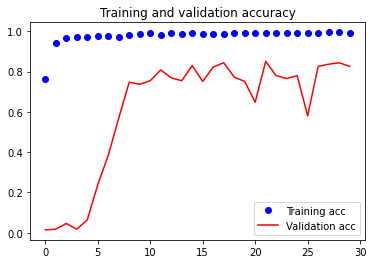

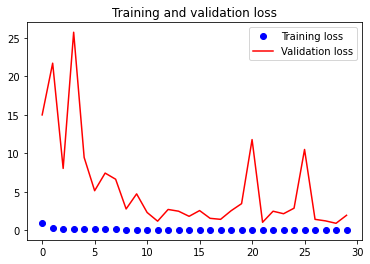

In [39]:
#plot

import matplotlib.pyplot as plt

acc = resnet_model_1_fit_generator.history['acc']
val_acc = resnet_model_1_fit_generator.history['val_acc']
loss = resnet_model_1_fit_generator.history['loss']
val_loss = resnet_model_1_fit_generator.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'r')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'r')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [40]:
#predict

resnet_test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:
resnet_test_generator = resnet_test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=1,
        shuffle = False,
        class_mode='categorical')

filenames = resnet_test_generator.filenames
nb_samples = len(filenames)


Found 2207 images belonging to 34 classes.


In [42]:
nb_samples

2207

In [43]:
predict = resnet_transfer_model_1.predict_generator(resnet_test_generator,steps = nb_samples, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2207/2207 - 1209s


In [45]:
from sklearn.metrics import plot_confusion_matrix

In [51]:
r_y_true = resnet_test_generator.classes
r_y_pred = predict.argmax(axis=1)


In [134]:
import urllib
url, filename = ("https://images.everydayhealth.com/images/apples-101-about-1440x810.jpg?sfvrsn=f86f2644_1", "apple.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [124]:
filename = '/content/gdrive/MyDrive/GDataImage/dataset/train/Zucchini/Zucchini_029.jpg'

In [113]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [135]:
# load the image
img = load_img(filename, target_size=(224, 224))
# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels
img = img.reshape(1,224,224,3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

In [136]:
result = resnet_transfer_model_1.predict(img)

In [137]:
result.argmax()

0